In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [3]:
data = yf.download("AAPL", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,70.570000,75.360001,69.430000,74.702499,74.127892,341397200
2020-03-03,75.917503,76.000000,71.449997,72.330002,71.773636,319475600
2020-03-04,74.110001,75.849998,73.282501,75.684998,75.102829,219178400
2020-03-05,73.879997,74.887497,72.852501,73.230003,72.666725,187572800
2020-03-06,70.500000,72.705002,70.307503,72.257500,71.701706,226176800


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103916400
2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,158273000
2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,111039900
2021-02-25,124.680000,126.459999,120.540001,120.989998,120.989998,148199500
2021-02-26,122.589996,124.849998,121.199997,121.260002,121.260002,164320000


In [7]:
data = pd.DataFrame(data = data['Adj Close'])

In [8]:
data

,Adj Close
Date,
2020-03-02,74.127892
2020-03-03,71.773636
2020-03-04,75.102829
2020-03-05,72.666725
2020-03-06,71.701706
...,...
2021-02-22,126.000000
2021-02-23,125.860001
2021-02-24,125.349998


array([<AxesSubplot:xlabel='Date'>], dtype=object)

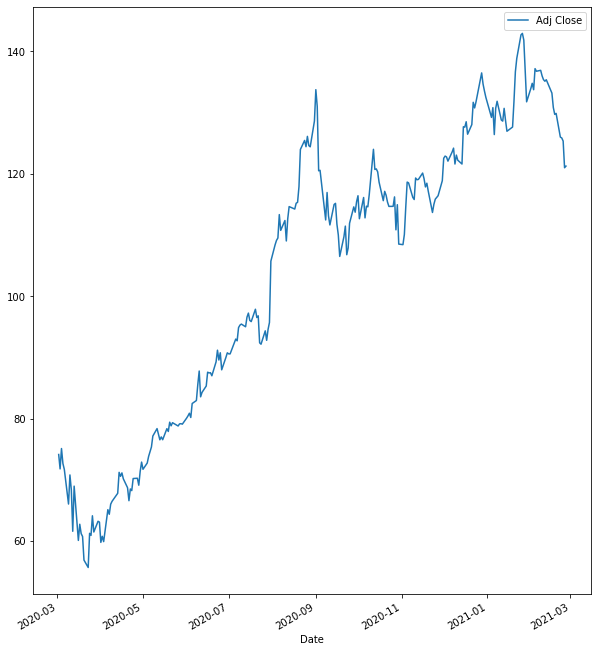

In [9]:
data.plot(figsize=(10, 12), subplots=True)

In [10]:
data['returns'] = (data['Adj Close'] /data['Adj Close'].shift(1)) - 1

In [11]:
data.head()

,Adj Close,returns
Date,,
2020-03-02,74.127892,NaN
2020-03-03,71.773636,-0.031759
2020-03-04,75.102829,0.046385
2020-03-05,72.666725,-0.032437
2020-03-06,71.701706,-0.013280


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-02 to 2021-02-26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
 1   returns    250 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [13]:
print(data)

             Adj Close   returns
Date                            
2020-03-02   74.127892       NaN
2020-03-03   71.773636 -0.031759
2020-03-04   75.102829  0.046385
2020-03-05   72.666725 -0.032437
2020-03-06   71.701706 -0.013280
...                ...       ...
2021-02-22  126.000000 -0.029799
2021-02-23  125.860001 -0.001111
2021-02-24  125.349998 -0.004052
2021-02-25  120.989998 -0.034783
2021-02-26  121.260002  0.002232

[251 rows x 2 columns]


In [14]:
#Daily Volatility
daily_std =np.std(data.returns)
daily_std

0.02871718529531506

In [15]:
#Annualised volatility
std = daily_std * np.sqrt(252)
std

0.45587118387098763

In [16]:
data = yf.download("AAPL", start="2020-03-01", end="2021-09-01")

[*********************100%***********************]  1 of 1 completed


In [17]:
data = pd.DataFrame(data = data['Adj Close'])

In [18]:
print(data)

             Adj Close
Date                  
2020-03-02   74.127892
2020-03-03   71.773636
2020-03-04   75.102829
2020-03-05   72.666725
2020-03-06   71.701706
...                ...
2021-03-17  124.760002
2021-03-18  120.529999
2021-03-19  119.989998
2021-03-22  123.389999
2021-03-23  122.540001

[268 rows x 1 columns]


In [19]:
data['returns'] = (data['Adj Close'] /data['Adj Close'].shift(1)) - 1

In [20]:
#Daily Volatility
daily_std =np.std(data.returns)
daily_std

0.02851592942420764

In [21]:
#Annualised volatility
std = daily_std * np.sqrt(252)
std

0.45267634596193623

In [22]:
import os

In [39]:
#note sig= average of 6M and 12M annualised volatility
S0 = 70.786301              # spot stock price
K = 72.5               # strike
T = 4/52                 # maturity 
r = 0.0174                # risk free rate 
sig = 0.454273765             # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "binary put"          # payoff

In [40]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [41]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [42]:
S

array([[70.786301  , 76.12734366, 81.87138431, 88.04883038],
       [ 0.        , 65.81998226, 70.786301  , 76.12734366],
       [ 0.        ,  0.        , 61.20209706, 65.81998226],
       [ 0.        ,  0.        ,  0.        , 56.90819955]])

In [43]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 1.0


In [47]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [52]:
S0 = 70.786301              # spot stock price
K = 72.5               # strike
T = 4/52                 # maturity 
r = 0.0174                # risk free rate 
sigma = 0.454273765             # diffusion coefficient or volatility


In [53]:
S = mcs_simulation_np(1000)

In [54]:
S = np.transpose(S)
S

array([[70.786301  , 70.83811116, 71.05165011, ..., 56.21868692,
        56.23233724, 56.106363  ],
       [70.786301  , 70.6874018 , 70.37942969, ..., 82.94768788,
        83.03218365, 82.7979523 ],
       [70.786301  , 70.91915194, 71.00618883, ..., 84.75432907,
        84.58207215, 84.04317926],
       ...,
       [70.786301  , 70.9748804 , 70.69461259, ..., 66.20357004,
        66.06361121, 66.26145054],
       [70.786301  , 70.55080023, 70.66235408, ..., 60.76442079,
        60.70244055, 60.53901801],
       [70.786301  , 70.68811075, 70.55516553, ..., 64.64403394,
        64.49335344, 64.30103129]])

In [55]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.6913086913086913
